In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

ds_path = Path("..") / "dataset" / "splits" / "summary.csv"
df = pd.read_csv(ds_path)

In [2]:
print(df.head())

                                                path subject attire  variant  \
0  dataset/raw/s002/bv/uni/s002_uni2_bv_rp_wb_weg...    s002    uni        2   
1  dataset/raw/s001/bv/uni/s001_uni1_bv_cp_nb_v3.mp4    s001    uni        1   
2  dataset/raw/s002/fv/uni/s002_uni1_fv_lp_wb_weg...    s002    uni        1   
3  dataset/raw/s001/fv/uni/s001_uni3_fv_cp_nb_v4.mp4    s001    uni        3   
4  dataset/raw/s001/fv/uni/s001_uni3_fv_lp_wb_v2.mp4    s001    uni        3   

  view position bag eyeglasses  repetition  split  
0   bv       rp  wb        weg           3  train  
1   bv       cp  nb        NaN           3  train  
2   fv       lp  wb        weg           3  train  
3   fv       cp  nb        NaN           4  train  
4   fv       lp  wb        NaN           2  train  


In [3]:
fv = df[df['view'] == 'fv']

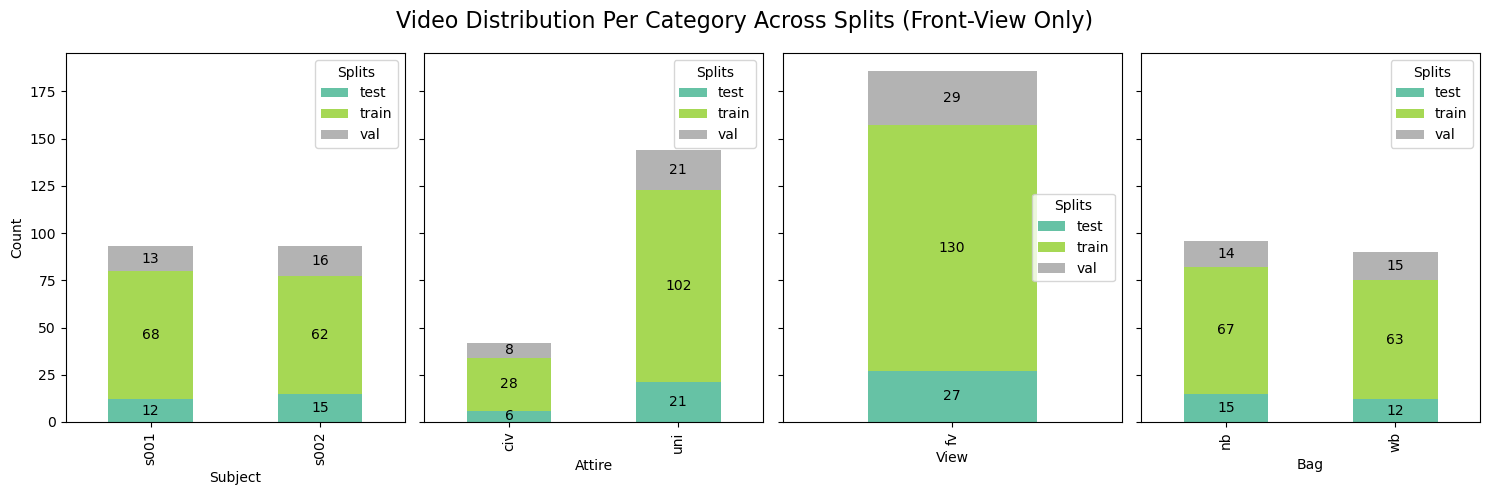

In [4]:
categories = ['subject', 'attire', 'view', 'bag']
titles = [f'{category.capitalize()} Distribution' for category in categories]

fig, axs = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Video Distribution Per Category Across Splits (Front-View Only)', fontsize=16)

for i, category in enumerate(categories):
    data = fv.groupby([category, 'split']).size().unstack().fillna(0)

    bars = data.plot(kind='bar', stacked=True, ax=axs[i], colormap='Set2')
    
    for container in bars.containers:
        bars.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='black')
        
        axs[i].set_xlabel(category.capitalize())
        axs[i].set_ylabel('Count' if i == 0 else '')
        axs[i].legend(title='Splits')
        
plt.tight_layout()
plt.show()

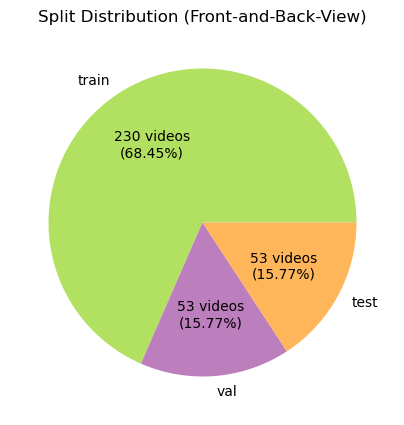

In [5]:
split_count = df['split'].value_counts()

def func(pct, allvalues):
    absolute = round(pct / 100.*sum(allvalues), 0)
    return f"{int(absolute)} videos\n({pct:.2f}%)"

plt.figure(figsize=(5,5))
plt.pie(split_count, labels=split_count.index, autopct=lambda pct: func(pct, split_count), colors=["#b2e061", "#bd7ebe", "#ffb55a"])
plt.title('Split Distribution (Front-and-Back-View)')
plt.show()